# Finding similar articles 

In [16]:
## libraries to import
from IPython.display import display, HTML
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


## setting nltk
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

## spacy
import spacy
from spacy import displacy

sns.set_theme(style='darkgrid')
pd.set_option('display.max_columns', 100)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\m7070\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already u

## Reading data

In [17]:
url = './articles.csv'
articles = pd.read_csv(url)
articles.drop(columns=['claps'], axis=1, inplace=True)
display(articles.head(10))
print(f'Shape of dataframe: {articles.shape}')

,author,reading_time,link,title,text
0,Justin Lee,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...
5,Irhum Shafkat,15,https://towardsdatascience.com/intuitively-und...,Intuitively Understanding Convolutions for Dee...,The advent of powerful and versatile deep lear...
6,Sam Drozdov,6,https://uxdesign.cc/an-intro-to-machine-learni...,An intro to Machine Learning for designers – U...,There is an ongoing debate about whether or no...
7,Conor Dewey,10,https://towardsdatascience.com/the-big-list-of...,The Big List of DS/ML Interview Resources – To...,Data science interviews certainly aren’t easy....
8,Abhishek Parbhakar,6,https://towardsdatascience.com/must-know-infor...,Must know Information Theory concepts in Deep ...,Information theory is an important field that ...
9,Aman Dalmia,17,https://blog.usejournal.com/what-i-learned-fro...,What I learned from interviewing at multiple A...,"Over the past 8 months, I’ve been interviewing..."


Shape of dataframe: (337, 5)


In [18]:
### pprint
from pprint import pprint
pprint(articles.iloc[1].to_dict(), compact=True)

{'author': 'Conor Dewey',
 'link': 'https://towardsdatascience.com/python-for-data-science-8-concepts-you-may-have-forgotten-i-did-825966908393?source=---------1----------------',
 'reading_time': 7,
 'text': 'If you’ve ever found yourself looking up the same question, concept, '
         'or syntax over and over again when programming, you’re not alone.\n'
         'I find myself doing this constantly.\n'
         'While it’s not unnatural to look things up on StackOverflow or other '
         'resources, it does slow you down a good bit and raise questions as '
         'to your complete understanding of the language.\n'
         'We live in a world where there is a seemingly infinite amount of '
         'accessible, free resources looming just one search away at all '
         'times. However, this can be both a blessing and a curse. When not '
         'managed effectively, an over-reliance on these resources can build '
         'poor habits that will set you back long-term.\n'
 

In [19]:
articles.describe(include='all')

,author,reading_time,link,title,text
count,337,337.000000,337,337,337
unique,182,NaN,337,230,230
top,Adam Geitgey,NaN,https://medium.com/swlh/chatbots-were-the-next...,Simple Reinforcement Learning with Tensorflow ...,For this tutorial in my Reinforcement Learning...
freq,16,NaN,1,6,6
mean,NaN,9.700297,NaN,NaN,NaN
std,NaN,5.482855,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,NaN
25%,NaN,6.000000,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN
75%,NaN,13.000000,NaN,NaN,NaN


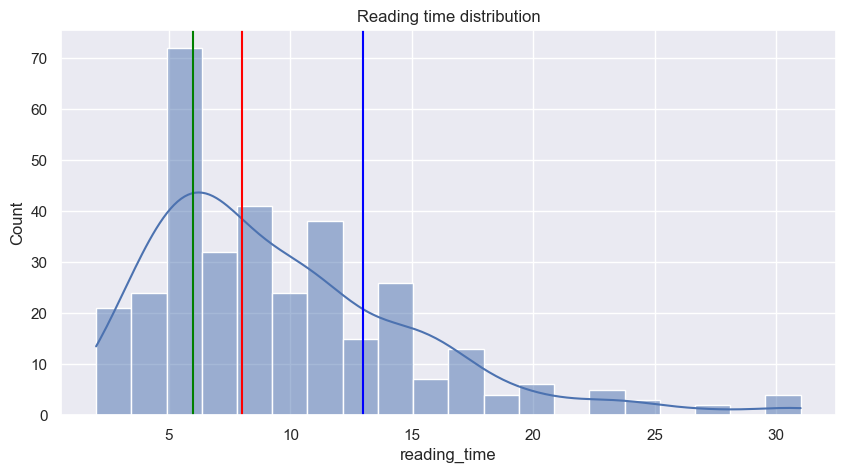

In [20]:
## Reading time
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(articles['reading_time'], ax=ax, bins=20, kde=True)

## percentile 
first_q = articles['reading_time'].quantile(0.25)
second_q = articles['reading_time'].quantile(0.5)
third_q = articles['reading_time'].quantile(0.75)

plt.axvline(first_q, color='green',label='25%')
plt.axvline(second_q, color='red',label='50%')
plt.axvline(third_q, color='blue',label='75%')

plt.title('Reading time distribution')
plt.show()

- The graph is right skewed
- Most of the articles have less reading time
- The median reading time is 9 minutes

## Reading time to article length

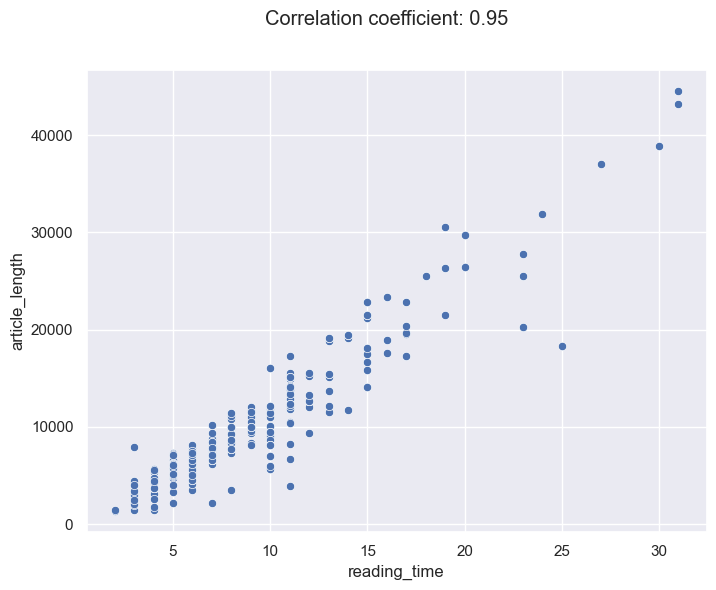

In [21]:
from scipy.stats import pearsonr

articles['article_length'] = articles['text'].apply(lambda x: len(x))

## scatterplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='reading_time', y='article_length', data=articles)

corr_coeff, _ = pearsonr(articles['reading_time'], articles['article_length'])

# plot title
plt.suptitle(f'Correlation coefficient: {corr_coeff:.2f}')
plt.show()

* The reading time and article length are highly correlated. 

## Writer write similar articles?

In [22]:
for author, count in dict(articles['author'].value_counts()).items():
    if count < 2:
        continue
    
    print(f'Article by {author}')
    
    for title in articles[articles['author'] == author]['title'].values:
        print(f'\t{title}')
    print('-'*120)

Article by Adam Geitgey
	Machine Learning is Fun! – Adam Geitgey – Medium
	Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
	Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
	Machine Learning is Fun! Part 2 – Adam Geitgey – Medium
	Machine Learning is Fun! – Adam Geitgey – Medium
	Machine Learning is Fun! Part 3: Deep Learning and Convolutional Neural Networks
	Machine Learning is Fun! Part 4: Modern Face Recognition with Deep Learning
	Machine Learning is Fun! Part 2 – Adam Geitgey – Medium
	Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
	Machine Learning is Fun Part 5: Language Translation with Deep Learning and the Magic of Sequences
	Machine Learning is Fun! Part 2 – Adam Geitgey – Medium
	Machine Learning is Fun! Part 2 – Adam Geitgey – Medium
	Machine Learning is Fun Part 6: How to do Speech Recognition with Deep Learning
	Machine Learning is Fun Part 5: Language Translation with Deep Lear

* Author tends to write multiple articles on the same topic
* But also, there are multiple author writing on the same topic.

## Pre-processing

### Expanding contractions

In [23]:
sample_text = """
I've decided to go the party. I'm going to be there at 9:30 pm. 
He's not going to come with us.
It's been a long time since I've seen you.
They've been married for twenty years. 
I won't be going to the movies after party.
"""

In [24]:
## Rule based approach 
## custom mapping
custom_mapping = {
    "n't" : " not",
    "'re" : " are",
    "'ve" : ' have',
    "'ll" : ' will',
    "'m" : ' am',
    "'s" : ' is'
}

expended_text = sample_text

for x in custom_mapping.keys():
    expended_text = expended_text.replace(x, custom_mapping[x])

print(expended_text)


I have decided to go the party. I am going to be there at 9:30 pm. 
He is not going to come with us.
It is been a long time since I have seen you.
They have been married for twenty years. 
I wo not be going to the movies after party.



In [25]:
## Using library contractions
! pip install contractions

import contractions
expanded_text = contractions.fix(sample_text)
print(expanded_text)


I have decided to go the party. I am going to be there at 9:30 pm. 
He is not going to come with us.
It is been a long time since I have seen you.
They have been married for twenty years. 
I will not be going to the movies after party.




[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Simple Techniques

### One Hot Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder
import itertools

## sample document
docs = ['cat', 'dog', 'bat', 'ate', 'lion']

## tokens 
tokens = [docs.split() for docs in docs]

## flatten the list
# all_tokens = list(itertools.chain(*tokens))

all_tokens = itertools.chain.from_iterable(tokens)

word_to_id = {token: idx for idx, token in enumerate(set(all_tokens))}

word_to_id

token_ids = [[word_to_id[token] for token in tokens] for tokens in tokens]
token_ids


[[4], [0], [2], [1], [3]]

In [27]:
vector= OneHotEncoder(categories='auto')
x = vector.fit_transform(token_ids)

print(x.toarray())

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [28]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import itertools

## sample document
docs = ['cat', 'dog', 'bat', 'ate', 'lion']

## tokens 
tokens = [docs.split() for docs in docs]

all_tokens = list(itertools.chain(*tokens))

all_tokens = np.array(all_tokens).reshape(-1, 1)

ohe = OneHotEncoder(categories='auto')
x = ohe.fit_transform(all_tokens)
x.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## Bag of words
### (Optimizing One Hot Encoding)

In [29]:
## sample data
corpos = [
    'it was the best of times',
    'it was the worst of times',
    'it was the age of wisdom and the age of foolishness'
] 

In [30]:
def bow(corpus, freq = True):
    
    vocab = set([x for x in " ".join(corpus).lower().split(" ")])
    print(f'Vocabulary: {vocab}')
    
    bow_rep = []
    
    for sentence in corpus:
        sentence_rep = dict([(v, 0) for v in vocab])
        
        for word in word_tokenize(sentence):
            if freq:
                sentence_rep[word] += 1
            
            else:
                sentence_rep[word] = 1
        
        bow_rep.append(sentence_rep)
    
    return bow_rep
        

In [31]:
bow_rep = bow(corpos)
print(bow_rep)

Vocabulary: {'of', 'times', 'foolishness', 'the', 'wisdom', 'age', 'worst', 'was', 'it', 'best', 'and'}
[{'of': 1, 'times': 1, 'foolishness': 0, 'the': 1, 'wisdom': 0, 'age': 0, 'worst': 0, 'was': 1, 'it': 1, 'best': 1, 'and': 0}, {'of': 1, 'times': 1, 'foolishness': 0, 'the': 1, 'wisdom': 0, 'age': 0, 'worst': 1, 'was': 1, 'it': 1, 'best': 0, 'and': 0}, {'of': 2, 'times': 0, 'foolishness': 1, 'the': 2, 'wisdom': 1, 'age': 2, 'worst': 0, 'was': 1, 'it': 1, 'best': 0, 'and': 1}]


## Count Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer()
# print(cv.fit_transform(corpos))
bow_rep = cv.fit_transform(corpos).todense() 

print(bow_rep)
df = pd.DataFrame(bow_rep, columns= cv.get_feature_names_out(), index= corpos)

display(df)

[[0 0 1 0 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0 1]
 [2 1 0 1 1 2 2 0 1 1 0]]


,age,and,best,foolishness,it,of,the,times,was,wisdom,worst
it was the best of times,0,0,1,0,1,1,1,1,1,0,0
it was the worst of times,0,0,0,0,1,1,1,1,1,0,1
it was the age of wisdom and the age of foolishness,2,1,0,1,1,2,2,0,1,1,0
